In [1]:
from netCDF4 import Dataset,MFDataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim, ALL_TIMES )
%matplotlib inline

/public/home/hysplit/software/anaconda3/envs/nc/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/public/home/hysplit/software/anaconda3/envs/nc/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
ncfile = Dataset("wrfout_d01_2019-03-22_00:00:00")

In [3]:
# Extract the pressure, geopotential height, and wind variables
p = getvar(ncfile, "pressure",timeidx=ALL_TIMES)
z = getvar(ncfile, "z", timeidx=ALL_TIMES,units="dm")
u10 = getvar(ncfile, "U10", timeidx=ALL_TIMES)
v10 = getvar(ncfile, "V10", timeidx=ALL_TIMES)
wspd = getvar(ncfile, "wspd_wdir", timeidx=ALL_TIMES,units="kts")[0,:]

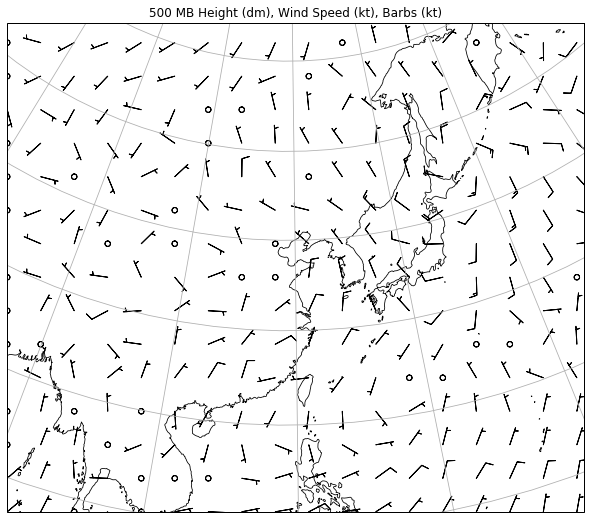

In [4]:
# Get the lat/lon coordinates
lats, lons = latlon_coords(u10)

# Get the map projection information
cart_proj = get_cartopy(u10)

# Create the figure
fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=0.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)


# Add the 500 hPa wind barbs, only plotting every 125th data point.
plt.barbs(to_np(lons[::5,::5]), to_np(lats[::5,::5]),
          to_np(u10[0,::5, ::5]), to_np(v10[0,::5, ::5]),
          transform=crs.PlateCarree(), length=6)

# Set the map bounds
ax.set_xlim(cartopy_xlim(u10))
ax.set_ylim(cartopy_ylim(u10))

ax.gridlines()

plt.title("500 MB Height (dm), Wind Speed (kt), Barbs (kt)")

plt.show()

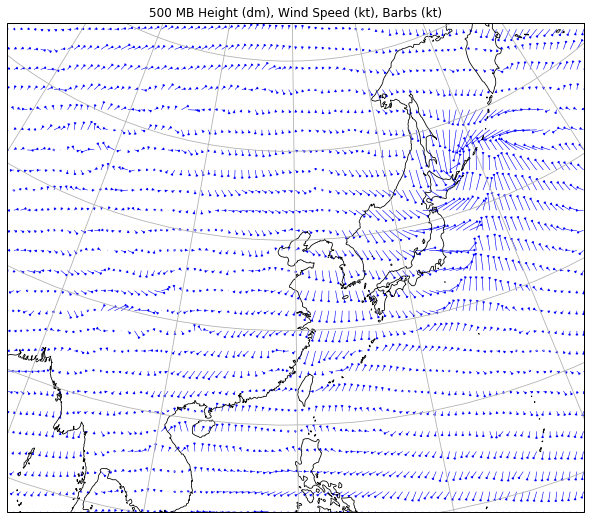

In [38]:
# Get the lat/lon coordinates
lats, lons = latlon_coords(u10)

# Get the map projection information
cart_proj = get_cartopy(u10)

# Create the figure
fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=0.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

lat = lats[:,:].squeeze()
lon = lons[:,:].squeeze()
u_wind = u10[0, :, :].squeeze()
v_wind = v10[0, :, :].squeeze()

# Add the 500 hPa wind barbs, only plotting every 125th data point.
ax.quiver(to_np(lon[::3]), to_np(lat[::3]),
          to_np(u_wind[::3]), to_np(v_wind[::3]),color='blue',
          scale=500,
          width=0.001, headwidth=5, headlength=1.,
          transform=crs.PlateCarree())
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')
# Set the map bounds
ax.set_xlim(cartopy_xlim(u10))
ax.set_ylim(cartopy_ylim(u10))

ax.gridlines()

plt.title("500 MB Height (dm), Wind Speed (kt), Barbs (kt)")

plt.show()

In [13]:
a=to_np(lon)

In [14]:
a

array([[ 92.53125 ,  93.11902 ,  93.709656, ..., 145.55103 , 146.1354  ,
        146.7168  ],
       [ 92.32861 ,  92.920166,  93.51471 , ..., 145.75421 , 146.34235 ,
        146.92746 ],
       [ 92.122925,  92.71838 ,  93.316864, ..., 145.96045 , 146.5524  ,
        147.14124 ],
       ...,
       [ 64.04727 ,  64.9924  ,  65.95572 , ..., 174.08398 , 175.00867 ,
        175.91577 ],
       [ 63.271393,  64.220276,  65.187805, ..., 174.86035 , 175.78821 ,
        176.698   ],
       [ 62.47711 ,  63.429413,  64.40094 , ..., 175.65509 , 176.58582 ,
        177.49799 ]], dtype=float32)